**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [ ]:
# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

Entrada do projeto:

- buying:   vhigh, high, med, low. (Preço de Compra: muito alto - 4, alto - 3, médio - 2  e baixo - 1)
- maint:    vhigh, high, med, low. (Preço da Manutenção: muito alto - 4, alto - 3, médio - 2  e baixo - 1)
- doors:    2, 3, 4, 5more. (nº de portas: 2, 3, 4 e 5 ou mais)
- persons:  2, 4, more. (nº de pessoas: 2, 4 e mais)
- lug_boot: small, med, big. (tamanho do porta malas: pequeno, médio e grande)
- safety:   low, med, high. (segurança estimada do carro: baixo, médio e alto)

Saída do projeto:
- category: unacceptable, acceptable, good, very good  (Categoria/Nível de avaliação: inaceitável, aceitável, bom e muito bom)

# Preparando os dados

## Tarefa #1: Recebendo os dados

In [ ]:
# Recebendo os dados:
data_google_id = '1QbuZTpEKKLzr5gUXK0I9bnOfv0qGg3Lb'
gdd(file_id=data_google_id,
    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados.csv", sep = ',')

## Tarefa #2: Analise Exploratória dos Dados

In [ ]:
dados.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,category
0,0,4.0,4.0,2,2,0.0,2.0,unacc
1,1,4.0,4.0,2,2,0.0,3.0,unacc
2,2,4.0,4.0,2,2,1.0,1.0,unacc
3,3,4.0,4.0,2,2,1.0,2.0,unacc
4,4,4.0,4.0,2,2,1.0,3.0,unacc


A coluna `Unnamed: 0` tem apenas os números dos index do nosso conjunto de dados. Deveremos remover essa coluna.

In [ ]:
dados.shape

(4836, 8)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4836 non-null   int64  
 1   buying      4813 non-null   float64
 2   maint       4819 non-null   float64
 3   doors       4824 non-null   object 
 4   persons     4821 non-null   object 
 5   lug_boot    4815 non-null   float64
 6   safety      4819 non-null   float64
 7   category    4816 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 302.4+ KB


Temos colunas do tipo object. Além disso, segunda as informações obtidas do conjunto de dados temos diversas colunas que são categóricas mas que já estão convertidas em valores numéricos. Entretanto teremos que tratar as colunas que estão com valores object.

In [ ]:
dados.isnull().sum()

,0
Unnamed: 0,0
buying,23
maint,17
doors,12
persons,15
lug_boot,21
safety,17
category,20


Temos valores nulos no nosso conjunto de dados. Logo DEVEMOS fazer o tratamento disso removendo os valores nulos

In [ ]:
dados.describe()

,Unnamed: 0,buying,maint,lug_boot,safety
count,4836.000000,4813.000000,4819.000000,4815.000000,4819.000000
mean,2417.500000,1.947434,2.048558,1.171547,2.428097
std,1396.177281,1.017072,1.018777,0.789985,0.694794
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1208.750000,1.000000,1.000000,1.000000,2.000000
50%,2417.500000,2.000000,2.000000,1.000000,3.000000
75%,3626.250000,3.000000,3.000000,2.000000,3.000000
max,4835.000000,4.000000,4.000000,2.000000,3.000000


Todas as colunas possuem valores na mesma ordem de grandeza. Logo não haverá necessidade de transformar as escalas dos valores de cada coluna.

## Tarefa#3: Tratamento dos dados

Removendo a coluna sem dados informativos:

In [ ]:
dados.drop(columns=['Unnamed: 0'], inplace = True)

Removendo os valores nulos:

In [ ]:
dados.dropna(inplace=True)
dados.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
category,0


Avaliando os valores únicos em cada coluna:

In [ ]:
colunas = dados.columns
for col in colunas:
  print('='*60)
  print(col)
  print(dados[col].unique())
  print('='*60)

buying
[4. 3. 2. 1.]
maint
[4. 3. 2. 1.]
doors
['2' '3' '4' '5more']
persons
['2' '4' 'more']
lug_boot
[0. 1. 2.]
safety
[2. 3. 1.]
category
['unacc' 'acc' 'vgood' 'good']


Vamos aplicar o One Hot encoding nas colunas `doors` e `persons`:

In [ ]:
one_hot_doors = pd.get_dummies(dados['doors'], prefix='doors', dtype=int)
one_hot_doors.head()

,doors_2,doors_3,doors_4,doors_5more
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
one_hot_persons = pd.get_dummies(dados['persons'], prefix='persons', dtype=int)
one_hot_persons.head()

,persons_2,persons_4,persons_more
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
dados = pd.concat([dados, one_hot_doors, one_hot_persons], axis =1)
dados.head()

,buying,maint,doors,persons,lug_boot,safety,category,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
0,4.0,4.0,2,2,0.0,2.0,unacc,1,0,0,0,1,0,0
1,4.0,4.0,2,2,0.0,3.0,unacc,1,0,0,0,1,0,0
2,4.0,4.0,2,2,1.0,1.0,unacc,1,0,0,0,1,0,0
3,4.0,4.0,2,2,1.0,2.0,unacc,1,0,0,0,1,0,0
4,4.0,4.0,2,2,1.0,3.0,unacc,1,0,0,0,1,0,0


Agora vamos fazer um drop nas colunas originais com valores do tipo object:

In [ ]:
dados.drop(columns=['doors','persons'], inplace = True)

In [ ]:
dados.head()

,buying,maint,lug_boot,safety,category,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
0,4.0,4.0,0.0,2.0,unacc,1,0,0,0,1,0,0
1,4.0,4.0,0.0,3.0,unacc,1,0,0,0,1,0,0
2,4.0,4.0,1.0,1.0,unacc,1,0,0,0,1,0,0
3,4.0,4.0,1.0,2.0,unacc,1,0,0,0,1,0,0
4,4.0,4.0,1.0,3.0,unacc,1,0,0,0,1,0,0


# Aplicando IA aos nossos dados

## Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
# Separando os dados de entrada e de saída
X = dados.drop(columns=['category'])
y = dados["category"] #Rótulos/Labels

# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

## Tarefa #2: Treinando os modelos

Vamos começar a "automatizar" a etapa de treinamento dos nossos modelos, uma vez que sempre teremos a seguinte estrutura:



```
clf = Modelo
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
```




Para essa automação vamos criar um dicionário que é um tipo de dado analogo a um documento JSON, isto é, ele é um documento chave, valor. Em Python, um dicionário é uma estrutura de dados que armazena pares de chave-valor. Ele permite o acesso rápido aos valores através de suas chaves únicas, que podem ser de qualquer tipo imutável, como strings ou números. Os dicionários são definidos com chaves e valores separados por dois pontos e são delimitados por chaves `{}`.

A sintaxe para criar um dicionário é : `meu_dicionario = {'chave1': 'valor1', 'chave2': 'valor2'}.`

No nosso exemplo teremos um par de chave-valor contendo uma string com o nome do modelo como chave e a classe do modelo como seu valor:


```
modelos = {'AD' : DecisionTreeClassifier(criterion='entropy',
                                         min_samples_split=4),
           'FA' : RandomForestClassifier(min_samples_split=4,
                                         n_estimators=10),
           'GBC' : GradientBoostingClassifier(min_samples_split=4,
                                              n_estimators=10)}
```



Também criaremos um dicionário vázio com as previsões de cada treinamento `y_pred = {}`. Após os treinamentos iremos usar a chave com o nome do modelo para adicionar elementos ao nosso dicionário. Para adicionar novos itens a um dicionário existente usamos a sintaxe `meu_dicionario['nova_chave'] = 'novo_valor'`. No nosso caso `y_pred[nome_modelo]=clf.predict(X_test)`



No laço de repetição `for` usamos o `for nome_modelo, modelo in modelos.items():` para percorrer todos os itens do dicionário criado anteriormente. Assim, em cada uma das repetições do laço a variável `nome_modelo` receberá a string com a chave do nosso dicionário e a variável `modelo` receberá cada um dos modelos que colocamos no nosso dicionário.

Assim, em `modelo.fit(X_train, y_train)` iremos treinar diferentes modelos a cada repetição do laço for (modelos estes definidos no dicionário) e as previsões irão ser armazenadas em um novo dicionário `y_pred` contendo um par de chave-valor sendo eles:

  - chave: String com o nome do modelo
  - valor: Todas as previsões feitas por aquele modelo com o `X_test`

In [ ]:
modelos = {'AD' : DecisionTreeClassifier(criterion='entropy',
                                         min_samples_split=4),
           'FA' : RandomForestClassifier(min_samples_split=4,
                                         n_estimators=10),
           'GBC' : GradientBoostingClassifier(min_samples_split=4,
                                              n_estimators=10)}
y_pred = {}
for nome_modelo, modelo in modelos.items():
  # Treinar o modelo:
  modelo.fit(X_train, y_train)
  y_pred[nome_modelo] = modelo.predict(X_test)

Assim, o dicionário de saída de dados terá a seguinte estrutura:



```
y_pred = {'AD': array(['vgood', 'vgood', 'unacc', 'acc',...]),
          'FA' : array(['good', 'vgood', 'unacc', 'acc',...]),
          'GBC' : array(['good', 'vgood', 'unacc', 'unacc',...])
}

```

Vale destacar que podemos acessar todas as previsões do modelo usando a sintaxe `y_pred['AD']`. Nesse caso o nosso resultado é: `array(['vgood', 'vgood', 'unacc', 'acc',...])`

## Tarefa #3: Métricas de desempenho do modelo

Vamos começar obtendo os textos que temos na coluna de saída (y). Faça isso para utilizar posteriormente ao gerar a matriz de confusão sem digitar de forma errada uma das saídas que o modelo pode produzir.

In [ ]:
dados['category'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Vamos seguir uma estrutura similar para automatizar o nosso projeto para obtenção da matriz de confusão e das métricas de desempenho.

Para obter as imagens da nossa matriz de confusão temos que usar a função `confusion_matrix()` para obtermos a matriz como um array e o `ConfusionMatrixDisplay()` para gerar a imagem com a matriz de confusão (Ambas as funções já foram explicadas em aulas passadas!). Como já temos o `y_pred` com todas as previsões dos diferentes modelos treinados podemos usá-lo para gerar essa imagem com as matrizes de confusão.


Para isso, usamos o `for i, (nome_modelo, y_p) in enumerate(y_pred.items()):`, onde:

  - `i` receberá um número (iniciando em 0) que será incrementando em uma unidade a cada repetição do laço;
  - `nome_modelo` recebe a cada repetição do laço uma das chave do dicionário `y_pred`;
  - `y_p` recebe a cada repetição do laço o valor associado a chave de `y_pred`;

Dentro do laço de repetição usamos o `y_p` para gerar a matriz de confusão (`cm`). Esse resultado gera a imagem (`disp`) em `ConfusionMatrixDisplay()`. Por fim, `ax = plt.subplot(1,3,i+1)` e `disp.plot(ax=ax)` faz com que a matriz de confusão seja plotada na posição i+1 da imagem que possui 1 linha e 3 colunas definidas em `plt.subplot()`

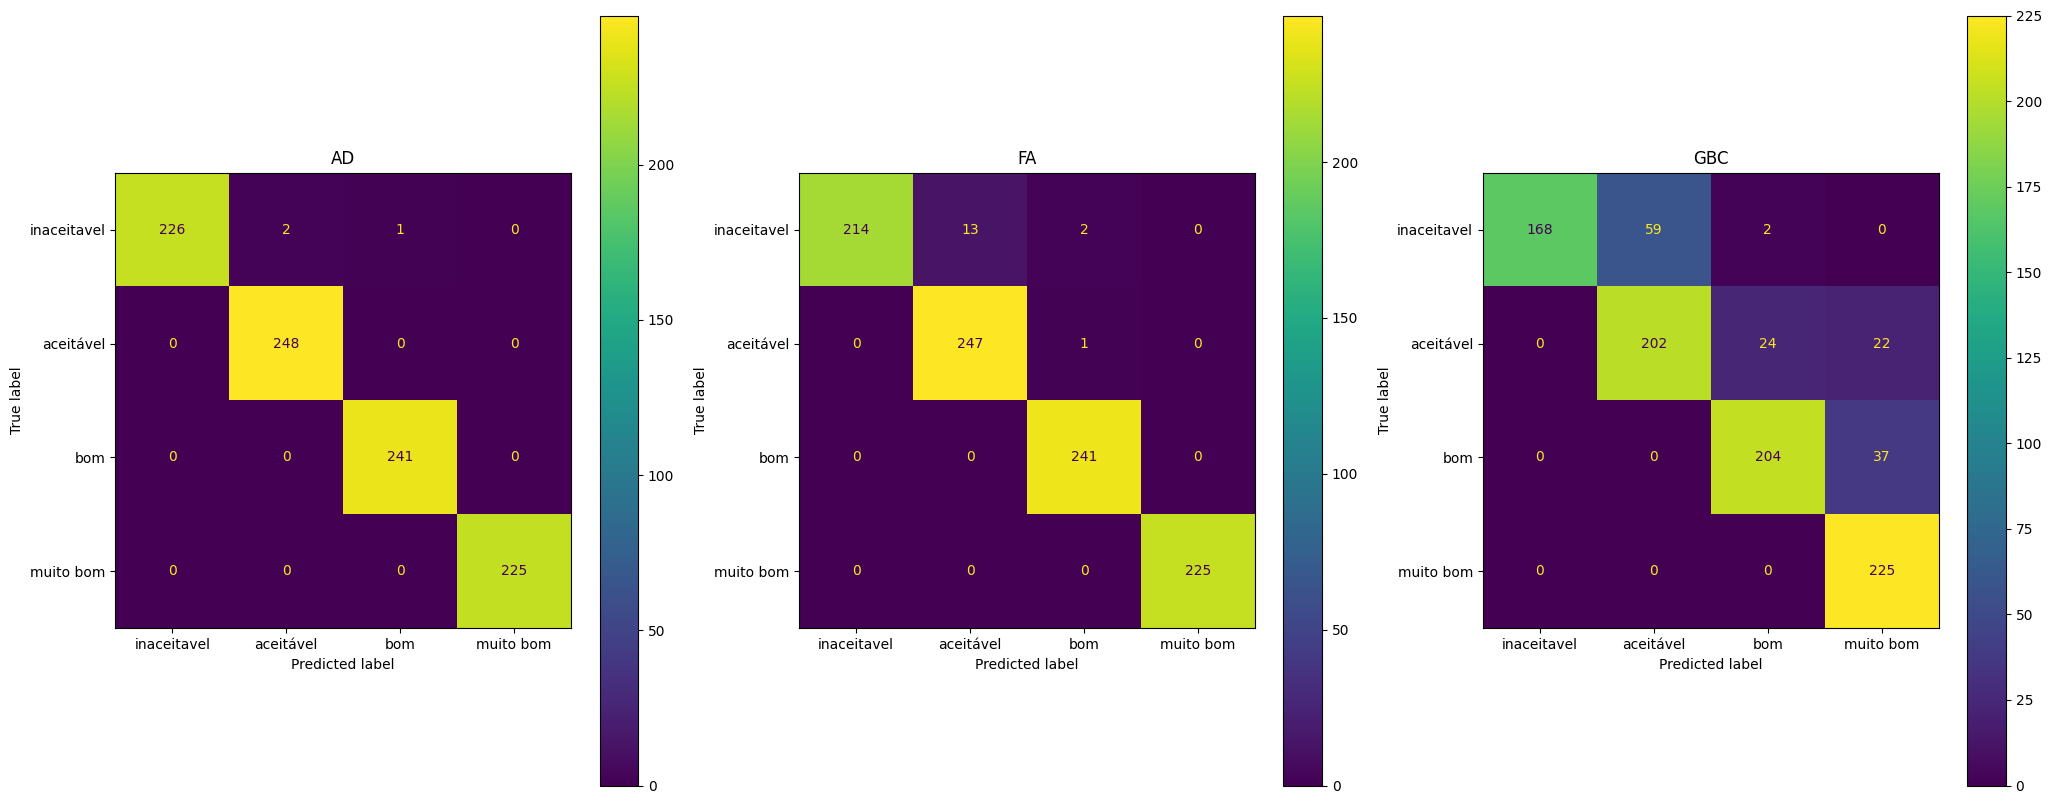

In [ ]:
figure = plt.figure(figsize=(25,10))
for i, (nome_modelo, y_p) in enumerate(y_pred.items()):
  cm = confusion_matrix(y_true=y_test,
                        y_pred=y_p,
                        labels=['unacc', 'acc', 'good', 'vgood'])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['inaceitavel',
                                                'aceitável',
                                                'bom',
                                                'muito bom'])
  ax = plt.subplot(1,3,i+1)
  disp.plot(ax=ax)
  ax.set_title(nome_modelo)

Para obter as métricas iremos fazer algo mais simples usando um laço de repetição em um dicionário e a função `print`()`

In [ ]:
for nome_modelo, y_p in y_pred.items():
  print(f"Métricas do modelo: {nome_modelo}")
  print(classification_report(y_true=y_test,
                              y_pred=y_p))
  print('-'*53)

Métricas do modelo: AD
              precision    recall  f1-score   support

         acc       0.99      1.00      1.00       248
        good       1.00      1.00      1.00       241
       unacc       1.00      0.99      0.99       229
       vgood       1.00      1.00      1.00       225

    accuracy                           1.00       943
   macro avg       1.00      1.00      1.00       943
weighted avg       1.00      1.00      1.00       943

-----------------------------------------------------
Métricas do modelo: FA
              precision    recall  f1-score   support

         acc       0.95      1.00      0.97       248
        good       0.99      1.00      0.99       241
       unacc       1.00      0.93      0.97       229
       vgood       1.00      1.00      1.00       225

    accuracy                           0.98       943
   macro avg       0.98      0.98      0.98       943
weighted avg       0.98      0.98      0.98       943

------------------------------

Podemos perceber que o modelo de arvore de decisão foi o que obteve o melhor desempenho nesse cenário. Entretanto, esse conjunto de dados é um exemplo simples de problema que pode ser resolvido por modelos baseados em árvores. Por isso, ele foi escolhido para essa aula